##**Telecom Churn and Retention Analysis**

This module supports an end-to-end telecom churn and retention analysis designed for a Data Analyst portfolio project. The analysis integrates SQL for data extraction, Python for data cleaning, exploratory data analysis (EDA), and feature engineering, and Power BI for visualization
and stakeholder reporting.

The objective of this project is to identify key customer churn drivers, analyze retention patterns, and deliver data-driven insights that inform business decisions and customer retention strategies.

This file focuses on the Python-based analytical workflow and is part of a broader analytics pipeline that demonstrates practical data analysis, business thinking, and cross-tool integration.

**Author: ADITYA CHAUHAN**

**Date: Jan-2026**

**Tools: SQL, Python, Power BI**


##**Business problem**
**Customer churn** is a critical challenge for the telecom industry, directly impacting **revenue, profitability, and long-term customer lifetime value**. In a highly competitive market with low switching costs, even a small increase in churn can lead to significant financial losses and increased acquisition costs.

The business is currently experiencing ongoing customer attrition, but lacks a clear, data-driven understanding of:


1.  **Which customers are most likely to churn ?**
2.   **What factors are driving churn ?**
3.   **Which customer segments require immediate intervention ?**
4.   **How retention efforts can be prioritized effectively ?**


At present, retention strategies are largely reactive and generalized, resulting in inefficient use of marketing budgets and inconsistent customer outcomes. Without actionable insights, the organization risks:


*   **Losing high-value customers.**
*   **Offering incentives to low-risk customers unnecessarily.**
*   **Missing early warning signals of churn.**


This project aims to address these gaps by leveraging historical customer data to identify churn patterns, key behavioral and service-related drivers, and high-risk customer segments. The insights generated will enable the business to shift from a reactive to a proactive, targeted retention strategy, improving customer satisfaction and reducing churn-related revenue loss.

The analysis is designed to support business stakeholders, retention teams, and leadership in making informed, data-backed decisions that directly impact customer retention and overall business performance.


In [ ]:
# importing all the dependencies required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math

In [ ]:
# load the dataframe
df = pd.read_excel("/raw data.xlsx")

## **Data Exploration**

In [ ]:
# Load the first 5 rows of the dataframe.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# shape of the dataframe
df.shape

(7043, 21)

In [ ]:
# column names in the dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# statistical summary of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Before modeling, we must understand the data structure.


*   **Target Variable**: Churn (Yes/No)

*    **Numerical Features**  : tenure, MonthlyCharges, TotalCharges

*   **Categorical Features**: Gender, InternetService, Contract, etc.

**Note**: We observe that TotalCharges was read as an object type, so we converted it to numeric and handled missing values.

##**Data Cleaning and Preparation**

In [ ]:
# converting total charges datatype to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype
df = df.dropna() # Drop nan columns, (only TotalCharges contains nan values)

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'}) # Ordinal Encoding, (later we'll perform this on all the features -> this is just for visuals)

In [ ]:
# convert churn column from object datatype to integer
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df["Churn"].value_counts())
print(df["Churn"].dtype)


Churn
0    5163
1    1869
Name: count, dtype: int64
int64


# **Data Analysis**

###**Ques - What is the churn distribution in the dataset ?**

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


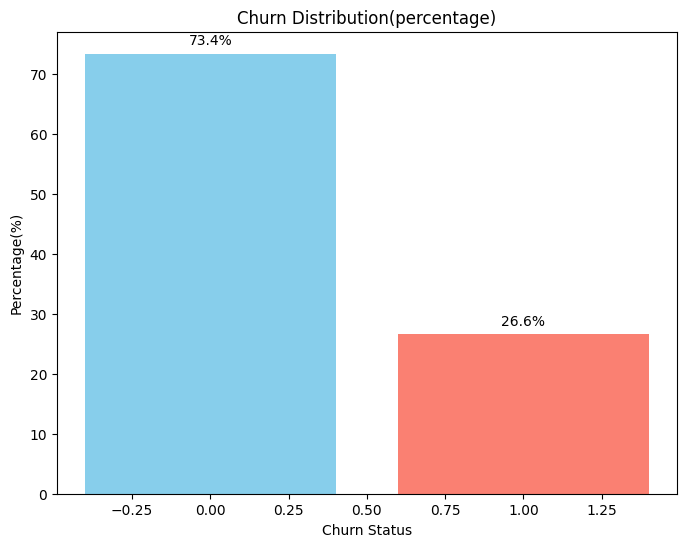

<Figure size 640x480 with 0 Axes>

In [ ]:
percentages = df['Churn'].value_counts(normalize=True) * 100
print(percentages)
plt.figure(figsize=(8, 6))
bars = plt.bar(percentages.index, percentages.values,color=['skyblue', 'salmon'])
plt.title('Churn Distribution(percentage)')
plt.xlabel('Churn Status')
plt.ylabel('Percentage(%)')
for bar in bars:
           yval = bar.get_height()
           plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
plt.show()
plt.savefig('churn_percentage_viz.png')

**Insight** -  More than 1 in 4 customers leave, which is high for a subscription telecom business and signals urgent need for retention interventions.

### **Q - How much Monthly Revenue loss due to Churn ?**

In [ ]:
# First Calculate total monthly revenue of the company
total_monthly_revenue = df['MonthlyCharges'].sum()
print(f"Total monthly revenue :",total_monthly_revenue,"USD")
# now calculate monthly revenue loss due to churn
monthly_revenue_loss = df[df['Churn'] == 1]['MonthlyCharges'].sum()
print(f"Monthly revenue loss :",monthly_revenue_loss,"USD")
# calculate percentage of revenue loss
revenue_loss_percentage = (monthly_revenue_loss / total_monthly_revenue) * 100
print(F"Revenue loss percentage",revenue_loss_percentage,"%")


Total monthly revenue : 455661.0 USD
Monthly revenue loss : 139130.85 USD
Revenue loss percentage 30.533850823309432 %


**Insight :**

The company generates 455661 USD in monthly recurring revenue, but loses 139130 USD per month due to customer churn which is 30% of the monthly revenue.

# **Churn vs Tenure**

/tmp/ipython-input-53843008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='viridis')


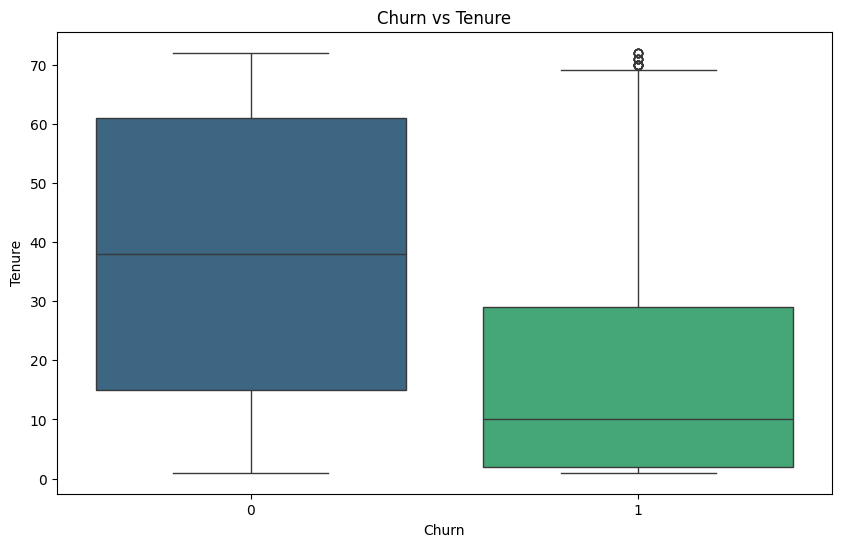

In [ ]:
# To check when customers churn in their lifecycle
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette='viridis')
plt.title('Churn vs Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.savefig('churn vs tenure_viz.png')
plt.show()


**Insight**- Customers who churn have significantly lower tenure, indicating churn happens early in the customer lifecycle.

In [ ]:
df.groupby('Churn')['tenure'].mean()

,tenure
Churn,
0,37.650010
1,17.979133


**Insight** :

*   Customers who did NOT churn stayed ~38 months
*   Customers who churned stayed ~18 months






# **Churn vs Monthly Charges**

/tmp/ipython-input-2476430435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='viridis')


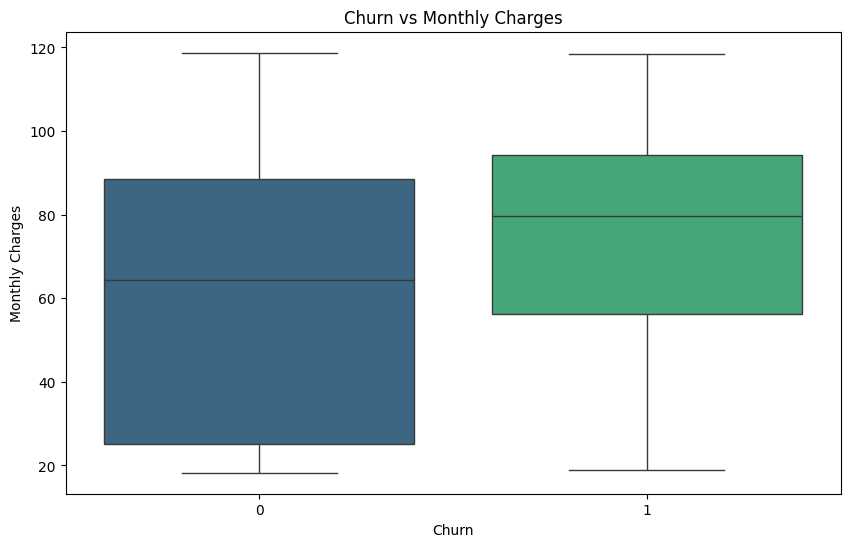

In [ ]:
# To understand the pricing sensitivity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='viridis')
plt.title('Churn vs Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.savefig('churn vs monthly charges_viz.png')
plt.show()

## **Insight** - Contrary to the common assumption that high bills drive customers away, our data reveals opposite that churn is most prevalent among low-spending customers.There are few premium customers also who also churned even after paying high monthly bills.

In [ ]:
df.groupby('Churn')['MonthlyCharges'].mean()

,MonthlyCharges
Churn,
0,61.307408
1,74.441332


**insight** - customers churned actually pays lesser monthly bills than loyal ones.

# **Churn vs Contract type**

/tmp/ipython-input-492080140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_churn.index, y=contract_churn.values, palette='viridis',legend=False)


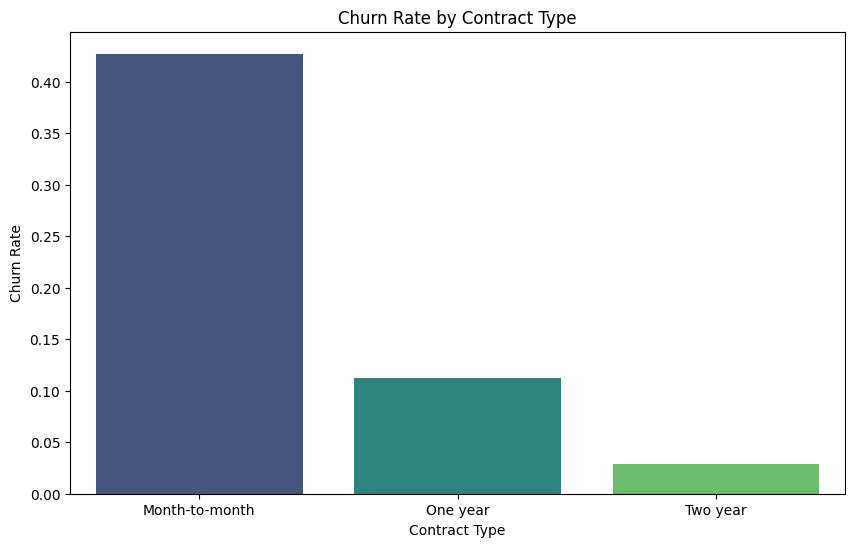

In [ ]:
# identify policy level churn drivers
contract_churn = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=contract_churn.index, y=contract_churn.values, palette='viridis',legend=False)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.savefig('churn vs contract type_viz.png')
plt.show()

**Insights**

Month-to-month contracts show the highest churn, while long-term contracts retain customers effectively.



# **Churn vs payment method**

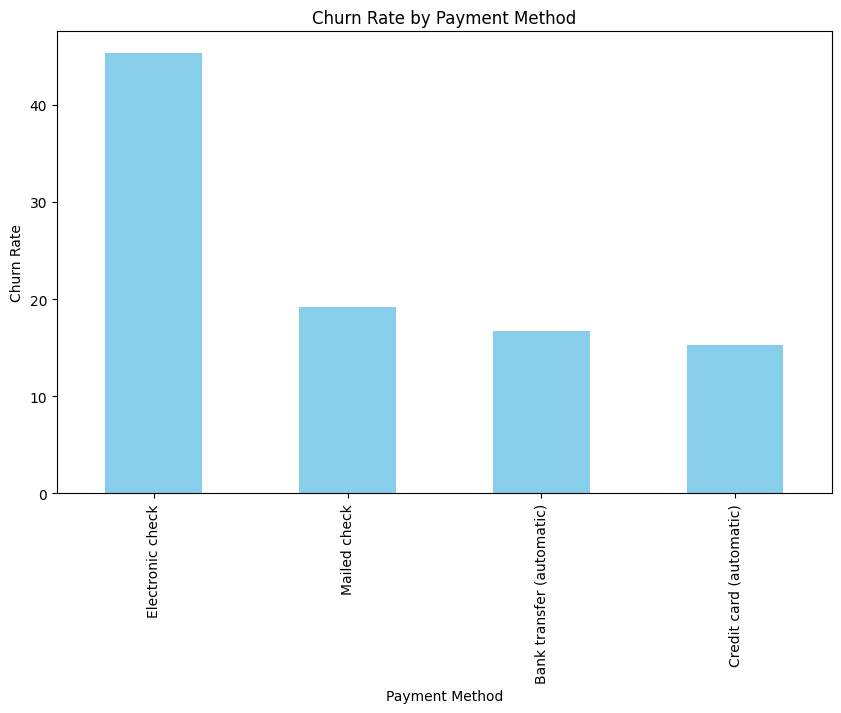

,Churn
PaymentMethod,
Electronic check,45.285412
Mailed check,19.201995
Bank transfer (automatic),16.731518
Credit card (automatic),15.253123


In [ ]:
# Detect behavioral churn signals
payment_churn = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)
payment_churn = payment_churn*100
payment_churn.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.savefig('churn vs payment method_viz.png')
plt.show()
payment_churn

**Insights**

Customers using electronic checks churn more than auto-pay users.

# **Churn vs Internet Service**

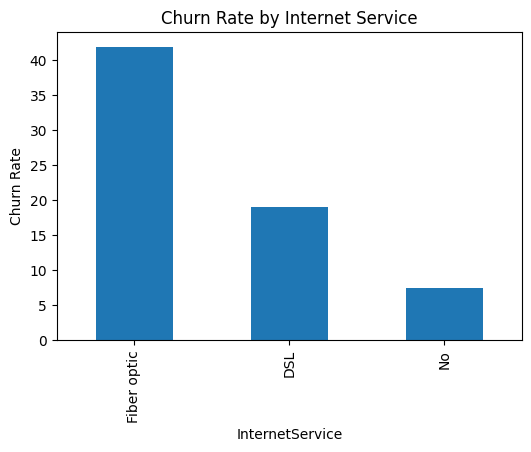

In [ ]:
# Check service-related dissatisfaction
internet_churn = df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False)*100

internet_churn.plot(kind='bar', figsize=(6,4))
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
plt.show()


**Insights**

Fiber optic customers churn more, possibly due to pricing or service quality expectations.

# **Churn vs Add-on Features**

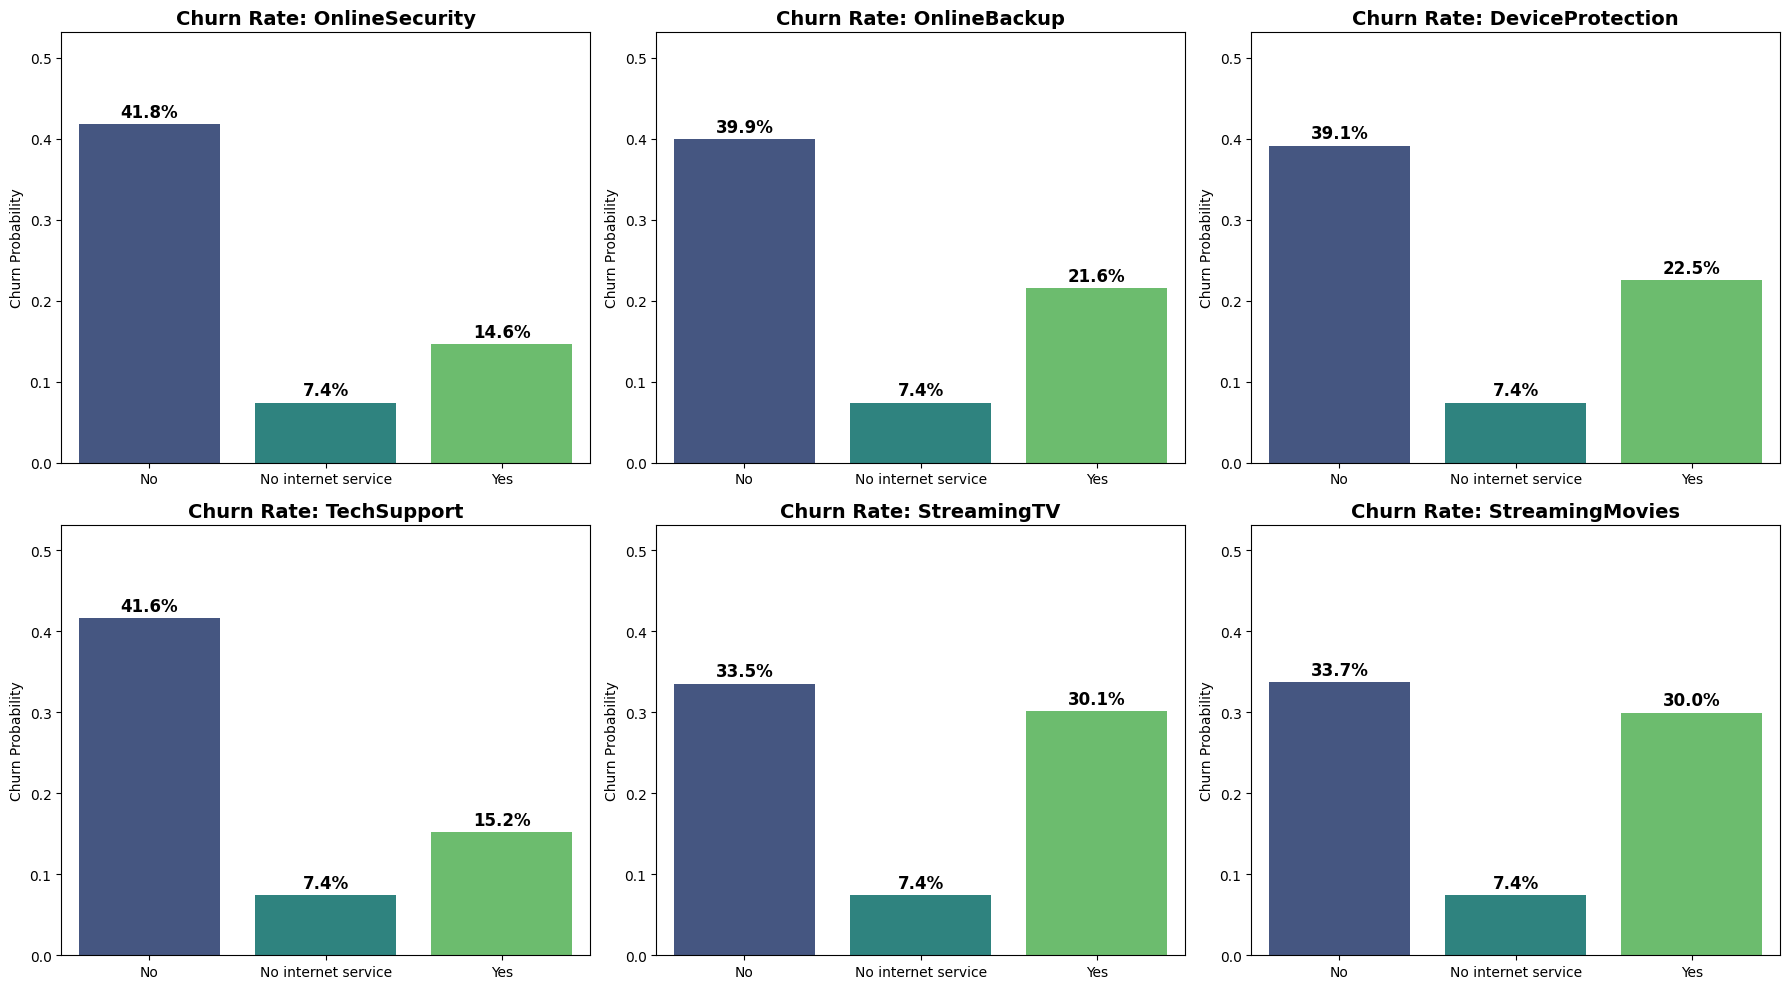

In [ ]:

import math
add_on_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# 1. Setup the grid
ncols = 3
nrows = math.ceil(len(add_on_services) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(add_on_services):
    # Calculate the mean churn rate per category
    # We sort to ensure 'Yes' and 'No' are consistently placed
    data = df.groupby(col)['Churn'].mean().reset_index()

    # 2. Create the plot
    sns.barplot(
        x=col,
        y='Churn',
        data=data,
        ax=axes[i],
        hue=col,
        palette='viridis',
        legend=False
    )

    # 3. Add Percentage Labels on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1%}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 9),
                         textcoords='offset points',
                         fontsize=12, fontweight='bold')

    # 4. Styling
    axes[i].set_title(f'Churn Rate: {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Churn Probability')
    axes[i].set_xlabel('')
    axes[i].set_ylim(0, df['Churn'].mean() * 2) # Sets a consistent scale based on average

# 5. Clean up empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Insights**

Customers without support and security services churn significantly more.

# **Churn vs Demographics**

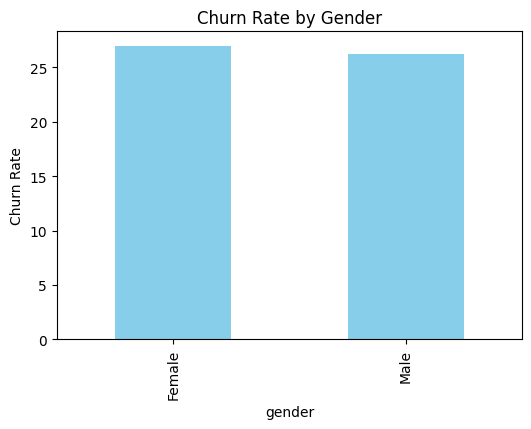

,Churn
gender,
Female,26.959518
Male,26.204565


In [ ]:
# To understand gender priority
gender_churn = df.groupby('gender')['Churn'].mean().sort_values(ascending=False)*100
gender_churn.plot(kind='bar', figsize=(6,4),color='skyblue')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.savefig('churn vs gender_viz.png')
plt.show()
gender_churn

**Insights**

both male and female have almost equal churn rate of 26%.

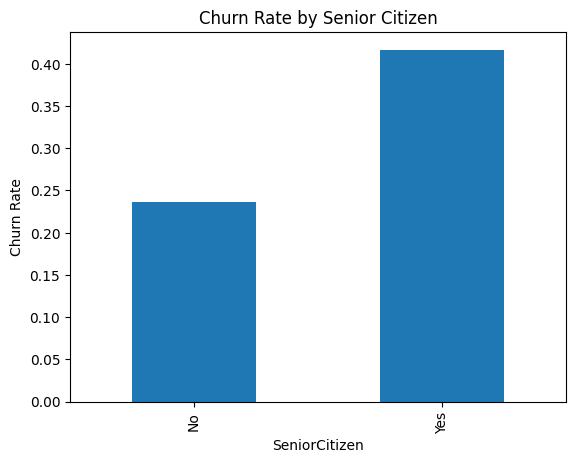

In [ ]:
df.groupby('SeniorCitizen')['Churn'].mean().plot(kind='bar', title='Churn Rate by Senior Citizen')
plt.ylabel('Churn Rate')
plt.savefig('churn vs senior citizen_viz.png')
plt.show()


**Insights**

Senior citizens show slightly higher churn.

# **Multivariate analysis**

In [ ]:
# QUES-DO NEW CUSTOMERS ON MONTH-TO-MONTH CONTRACTS CHURN MORE?
pd.crosstab([df['Contract'], df['tenure']],
            df['Churn'],
            normalize='index',
)*100

Churn                          0          1
Contract       tenure                      
Month-to-month 1       37.086093  62.913907
               2       47.391304  52.608696
               3       50.785340  49.214660
               4       50.303030  49.696970
               5       50.781250  49.218750
...                          ...        ...
Two year       68      96.923077   3.076923
               69      96.969697   3.030303
               70      94.318182   5.681818
               71      96.350365   3.649635
               72      98.833819   1.166181

[216 rows x 2 columns]

**Insights**


1. Customers on Month-to-month contracts are in the highest danger zone during their first 4 months.n the very first month, a staggering 62.9% leave. By month 5, this stabilizes slightly but remains high at nearly 50%.

2. Contracts are extremely effective. For Two-year contracts, churn is almost 0% for the first two years. Even for One-year contracts, the churn rate rarely exceeds 20%, showing that getting a customer to commit to a term is the best way to prevent loss.
3. Interestingly, for Month-to-month and Two-year plans, the churn rate hits 0% at exactly 72 months. This suggests that if you can keep a customer for 6 years, they become "customers for life."





In [ ]:
# QUES -  DOES PAYMENT BEHAVIOUR INCREASE CHURN RISK WITHIN CONTRACTS ?
pd.crosstab([df['PaymentMethod'],df['Contract']],
            df['Churn'],
            normalize='index'
            )

Churn                                            0         1
PaymentMethod             Contract                          
Bank transfer (automatic) Month-to-month  0.658744  0.341256
                          One year        0.902813  0.097187
                          Two year        0.966192  0.033808
Credit card (automatic)   Month-to-month  0.672192  0.327808
                          One year        0.896985  0.103015
                          Two year        0.977586  0.022414
Electronic check          Month-to-month  0.462703  0.537297
                          One year        0.815562  0.184438
                          Two year        0.922619  0.077381
Mailed check              Month-to-month  0.684211  0.315789
                          One year        0.931548  0.068452
                          Two year        0.992000  0.008000

In [ ]:
#create a bucket to split the monthly charges data into 3 equal parts.
df['Charge_group']=pd.qcut(df['MonthlyCharges'],q=3,labels=['Low','Medium','High'])

# Ques - Are new high paying customers more likely to churn ?
pd.crosstab([df['Charge_group'],df['tenure']],
            df['Churn'],
            normalize='index')

Churn                       0         1
Charge_group tenure                    
Low          1       0.555556  0.444444
             2       0.620000  0.380000
             3       0.662500  0.337500
             4       0.746479  0.253521
             5       0.681818  0.318182
...                       ...       ...
High         68      0.847826  0.152174
             69      0.844444  0.155556
             70      0.844828  0.155172
             71      0.942529  0.057471
             72      0.976744  0.023256

[216 rows x 2 columns]

**Insight**

In month 1, Low paying customers churn at ~62%, while High paying customers often have much lower initial churn rates.

# **Build a High-Risk Customer Segment**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Charge_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Medium
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Medium
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Low
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Medium


In [ ]:
# create a business-actionable churn segment
high_risk_customers = df[
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] < 12) &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['MonthlyCharges'] > 60)
]

high_risk_customers.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Charge_group
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Medium
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,High
36,6047-YHPVI,Male,No,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,1,Medium
47,7760-OYPDY,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,1,Medium
64,5698-BQJOH,Female,No,No,No,9,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,No,Electronic check,94.40,857.25,1,High


**Insight**

This segment represents customers with the highest churn probability and should be prioritized for retention campaigns

In [ ]:
# how bad is this segment compare to others ?
high_risk_customers['Churn'].value_counts(normalize=True) * 100



,proportion
Churn,
1,69.254658
0,30.745342


In [ ]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
0,73.421502
1,26.578498


**Insight**

Churn in high risk customers is more than double than overall churn rate.

# **Business Insights & Recommendations**

##**Telecom churn analysis**


###**🔍 Key Business Insights**


  1️⃣ **Early-Lifecycle Customers Drive Most Churn**


  Customers with tenure below 12 months show the highest churn rate. Nearly half of all churn occurs within the first year, indicating weak onboarding and unmet early expectations.

**2️⃣ Contract Type Is the Strongest Churn Driver**

Customers on month-to-month contracts churn at a significantly higher rate compared to one-year and two-year contracts. Long-term contracts act as a strong retention mechanism.

**3️⃣ Payment Friction Increases Churn Risk**

Customers using electronic checks churn more than those on auto-pay methods (credit card or bank transfer), suggesting that manual payment processes reduce customer stickiness.

**4️⃣ High-Value Customers Are Price Sensitive**

Churned customers have higher average monthly charges, indicating that premium customers may not perceive sufficient value for the price they pay.

**5️⃣ Support & Security Services Reduce Churn**

Customers without tech support and online security services churn significantly more, especially among high-risk segments. Add-on services improve customer engagement and loyalty.

**6️⃣ High-Risk Customer Profile Identified**

The highest churn risk is observed among customers who are:


*   On month-to-month contracts
*   Within their first year
*   Using electronic check payments
*   Paying higher monthly charges.
*   Not subscribed to support service



##**🎯 Business Recommendations**


####**🚀 Short-Term (Quick Wins)**


*   Strengthen first 90-day onboarding with guided setup, education emails, and proactive support calls.
*  Introduce auto-pay incentives such as small discounts or reward points.
*  Offer early retention offers to high-risk customers before month 6.


####**🛠 Medium-Term (Strategic Improvements)**


*   Promote contract upgrades by offering discounts or bundled services after 3–6 months.
*   Bundle tech support and security services with internet plans to increase perceived value.
*   Create personalized pricing offers for high-monthly-charge customers.


####**📈 Long-Term (Data-Driven Retention)**


*   Implement a churn prediction model to proactively identify at-risk customers.
*   Design lifecycle-based retention campaigns (new, mid-tenure, long-tenure).
*   Continuously test retention strategies using A/B experiments.


##**📊 Key KPIs to Monitor**

*  Overall churn rate
*  Early-life churn rate (0–6 months)
*  Contract upgrade conversion rate
*  Auto-pay adoption rate
*  Churn rate by tenure cohort


#**📝 Executive Summary**

This analysis identifies early tenure, contract type, payment behavior, pricing, and service usage as the primary drivers of customer churn. By improving onboarding, encouraging long-term contracts, reducing payment friction, and enhancing service value, the business can significantly reduce churn and improve customer lifetime value.